<a href="https://colab.research.google.com/github/Gapinian/Network-Science-ICN-2024/blob/main/S5_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 5
## Community detection in networks

In [205]:
import networkx as nx
import numpy as np

In [141]:
n = 396
pos = np.random.random((n, 2)) # x and y positions
k = 8 # groups
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters = k, n_init = 'auto').fit(pos)
leaders = clustering.cluster_centers_
groups = clustering.labels_

80 points, positioned completely at random. Grouped to 5 groups (k=5).

In [142]:
G = nx.Graph()

for point in range(n):
  coords = pos[point,:]
  G.add_node(point, pos = coords)

i = 0
for center in leaders:
  G.add_node(f'C{i}', pos = center)
  i += 1

A graph with no adges is made. 2 types of points: original points defined in a block above + an additional center for each group.

In [143]:
import seaborn as sns
colors = sns.color_palette('husl', k)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

A color code is generated for the k groups.

In [144]:
ca = []
for v in G.nodes():
  if 'C' not in str(v):
    ca.append(colors[groups[v]]) # points
  else:
    ca.append(colors[int(v[1:])]) # centers

Colors are assigned to groups

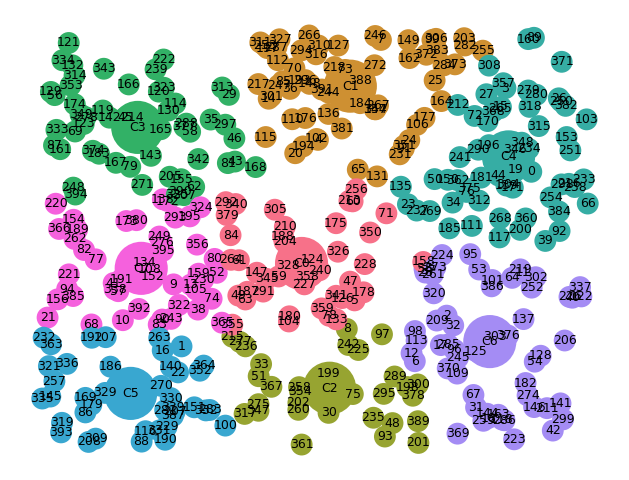

In [145]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
coords = nx.get_node_attributes(G, 'pos')

sizes = [90] * n + [600] * k #first number for the size of points, second number for the size of centers

nx.draw(G, coords, node_color = ca, node_size = sizes)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

In [215]:
G3 = nx.generators.random_graphs.connected_watts_strogatz_graph (5, 4, 0.1)
clusters = nx.community.greedy_modularity_communities(G3)
for c in clusters:
  print(c)

rank = nx.pagerank(G3) # default damping
print(list(rank.items()))

frozenset({0, 1, 2, 3, 4})
[(0, 0.2), (1, 0.2), (2, 0.2), (3, 0.2), (4, 0.2)]


In [257]:
from networkx.algorithms.centrality import edge_betweenness_centrality
centrality = edge_betweenness_centrality(G3)
print(list(centrality.items())[:3])

[((0, 1), 0.1), ((0, 4), 0.1), ((0, 2), 0.1)]


In [299]:
# normalize to [0, 1]
low = min(centrality.values())
high = max(centrality.values())
if high > low:
  span = high - low
  weight = [(centrality[e] - low) / span for e in G3.edges()]
else:
  weight = [centrality[e] for e in G3.edges]

In [300]:
print(min(weight), max(weight))

0.1 0.1


In [301]:
cc = sns.color_palette('hls', len(clusters))
colors = dict()
i = 0
for cluster in clusters:
  color = cc[i]
  for v in list(cluster):
    colors[v] = color
  i += 1

<Figure size 600x450 with 0 Axes>

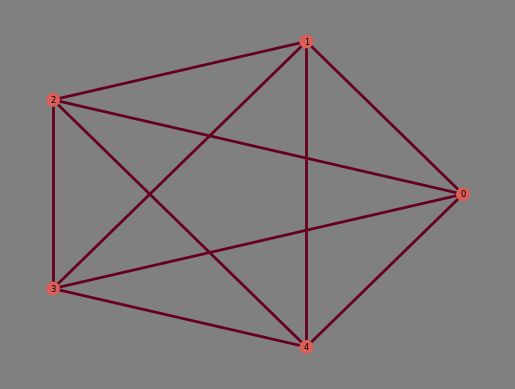

In [303]:
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
pos = nx.circular_layout(G3)

if 'width' in opt:
 del opt['width'] # discard
width = 10 # set a maximum
if 'edge_color' in opt:
 del opt['edge_color']
fig, ax = plt.subplots()
nx.draw(G3, pos,
        node_color = [ colors[v] for v in G3.nodes],
        node_size = 80,
        edge_cmap = plt.get_cmap('RdBu'),
        edge_color = weight,
        width = [width * w + 1 for w in weight])
ax.set_facecolor('black')
fig.set_facecolor('gray')
l = nx.draw_networkx_labels(G3, pos, font_size = 6)

The graph above groups node according to edges. Since all nodes are interconnected, they are put in the same group. In addition, since all nodes have the same # of edges, the edges have equal width (equal importance).

In [152]:
G2 = nx.generators.random_graphs.barabasi_albert_graph (20, 2)
clusters = nx.community.greedy_modularity_communities(G2, cutoff = 5, best_n = 5)
for c in clusters:
  print(c)

rank = nx.pagerank(G2) # default damping
print(list(rank.items()))

frozenset({0, 1, 17, 5, 7, 8, 14, 15})
frozenset({18, 3, 4, 9, 11, 13})
frozenset({19, 2, 10, 6})
frozenset({12})
frozenset({16})
[(0, 0.1831055261495482), (1, 0.018616827809869733), (2, 0.07867612318129145), (3, 0.11638775065508716), (4, 0.07886261241602953), (5, 0.09346986385701742), (6, 0.02963790887902864), (7, 0.02996636202732067), (8, 0.02996636202732067), (9, 0.029664509535698734), (10, 0.029762533547452903), (11, 0.029664509535698734), (12, 0.029789134204123005), (13, 0.04259762169578749), (14, 0.02996636202732067), (15, 0.02996636202732067), (16, 0.029609030951315195), (17, 0.02996636202732067), (18, 0.030561703897995667), (19, 0.029762533547452903)]


In [153]:
from networkx.algorithms.centrality import edge_betweenness_centrality
centrality = edge_betweenness_centrality(G2)
print(list(centrality.items())[:3])

[((0, 1), 0.09999999999999999), ((0, 2), 0.07105263157894737), ((0, 3), 0.15087719298245614)]


In [154]:
# normalize to [0, 1]
low = min(centrality.values())
high = max(centrality.values())
span = high - low
weight = [(centrality[e] - low) / span for e in G2.edges()]

In [155]:
cc = sns.color_palette('hls', len(clusters))
colors = dict()
i = 0
for cluster in clusters:
  color = cc[i]
  for v in list(cluster):
    colors[v] = color
  i += 1

<Figure size 600x450 with 0 Axes>

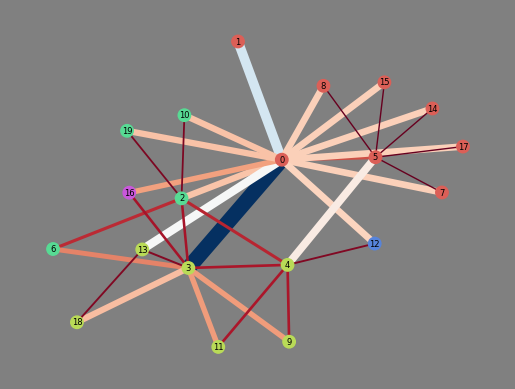

In [156]:
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
pos = nx.spring_layout(G2)

if 'width' in opt:
 del opt['width'] # discard
width = 10 # set a maximum
if 'edge_color' in opt:
 del opt['edge_color']
fig, ax = plt.subplots()
nx.draw(G2, pos, node_color = [ colors[v] for v in G2.nodes],
        node_size = 80,
        edge_cmap = plt.get_cmap('RdBu'),
        edge_color = weight, width = [width * w + 1 for w in weight])
ax.set_facecolor('black')
fig.set_facecolor('Grey')
l = nx.draw_networkx_labels(G2, pos, font_size = 6)